# Homework 2: U.S. Boundary Currents

Name: Stephen Tom

Date: 2/3/2025

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
# import modules here
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc4
import numpy as np

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

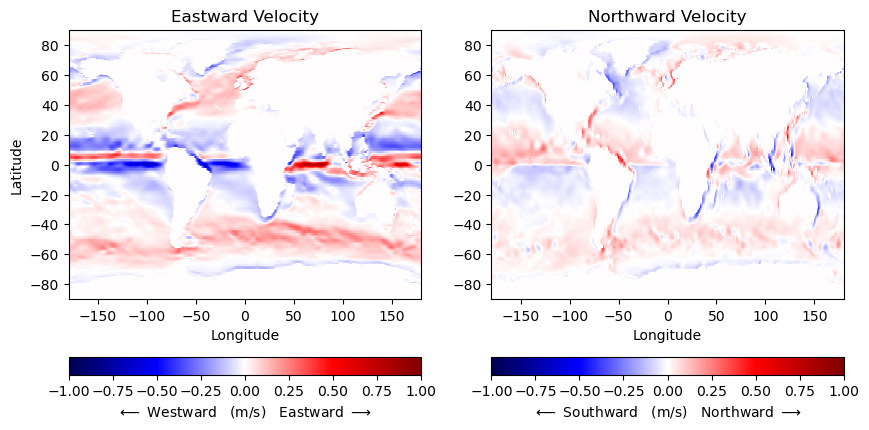

In [4]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal', label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal', label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

# change this cell to a markdown and input your response here
1a) 30N on the east code is mostly red which means warm water is north east
1b) 30N on the west cost is mostly blue which indicates that the water is cooler and moves south west
1c) 45N on the east coast is mostly red which indicates that warm water continues to go north east
1d) 45N on the west coast was mostly red and turns blue which indicates that the currents go south west

2) The current on the East Coast seems to be flowing much faster than the West Coast.

3) 

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [5]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [16]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])
lon = ds_theta['longitude'].values
lan = ds_theta['latitude'].values
depth = ds_theta['Z'].values

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

<Figure size 800x500 with 0 Axes>

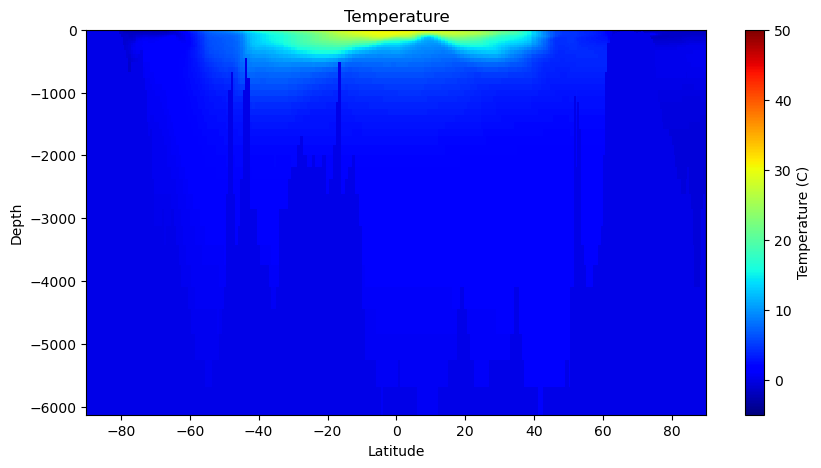

In [17]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data
Z = np.array(ds_theta['Z'])
# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
fig = plt.figure(figsize=(10,5))
C = plt.pcolormesh(lat,Z,theta[0, :, :, 0], vmin = -5, vmax=50, cmap='jet')
plt.colorbar(C, label='Temperature (C)' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Latitude');

### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

# change this cell to a markdown and input your response here
1) The west coast appears to be cooler than the east coast at the same latitude.
2) The ocean currents could be warm and cold, which would cause the temperature regime.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [10]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
wvelstar_ds = xr.open_dataset('WVELSTAR_2015_12.nc')

In [11]:
# store the WVELSTAR grid into a into numpy array
wvelstar = np.array(wvelstar_ds['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [54]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
depth = np.array(wvelstar_ds['Zl'])
theta_ds = xr.open_dataset('THETA_2015_12.nc')
theta = np.array(theta_ds['THETA'])
lat = theta_ds['latitude'].values
lon = theta_ds['longitude'].values

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

TypeError: Dimensions of C (1, 50, 360, 720) should be one smaller than X(720) and Y(50) while using shading='flat' see help(pcolormesh)

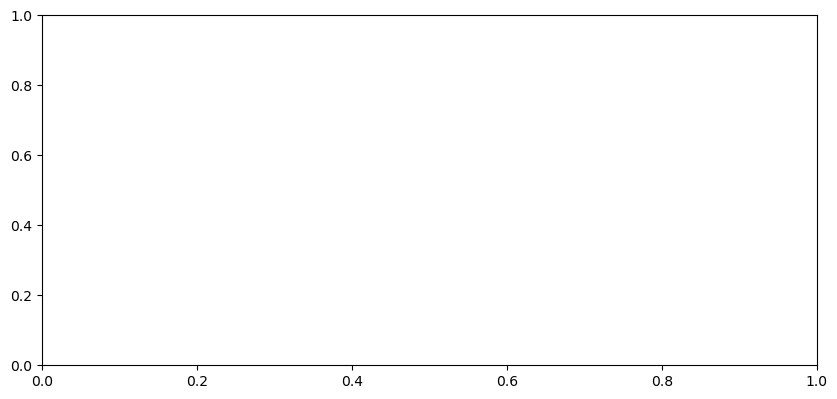

In [61]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2, 1, 1)
C = plt.pcolormesh (lon, depth, wvelstar, vmin=-0.000001, vmax=0.000001, cmap = 'turbo')
plt.title('Vertical Velocity at 40N')
plt.xlabel('Longitude')
plt.ylabel('Depth')

# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
C = plt.pcolormesh(lon, depth, theta, vmin = -1, vmax = 10, cmap = 'turbo')
plt.title('TEMPERATURE AT 40N')
plt.xlabel('Longitude')
plt.ylabel('Depth')


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

In [ ]:
# change this cell to a markdown and input your response here